<a href="https://colab.research.google.com/github/rohanapj/Advanced_Quality_Product_SPC_DigitalTransformation/blob/main/Quality_SPC_Model_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

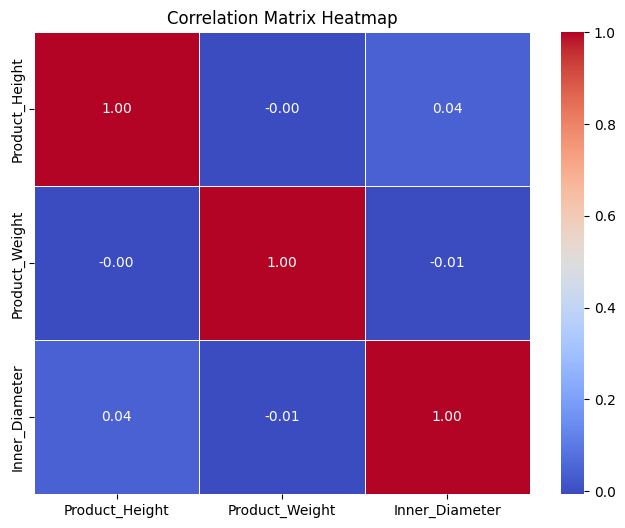

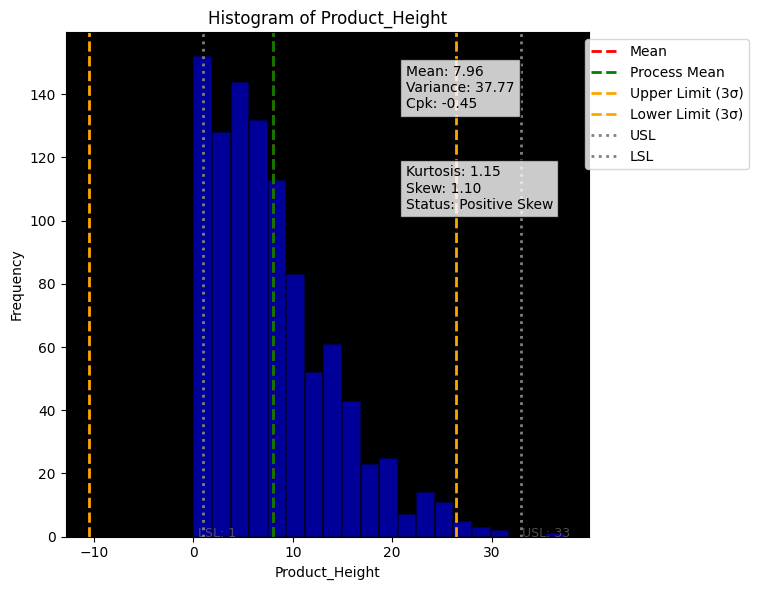

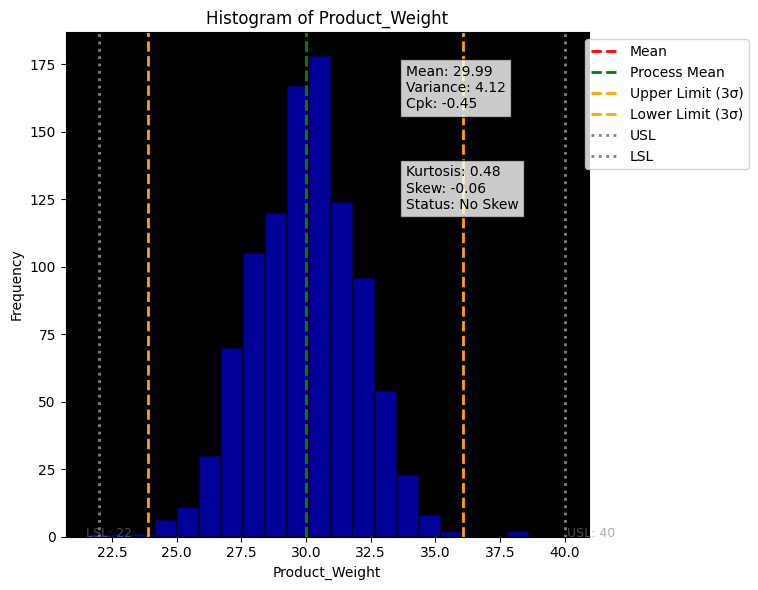

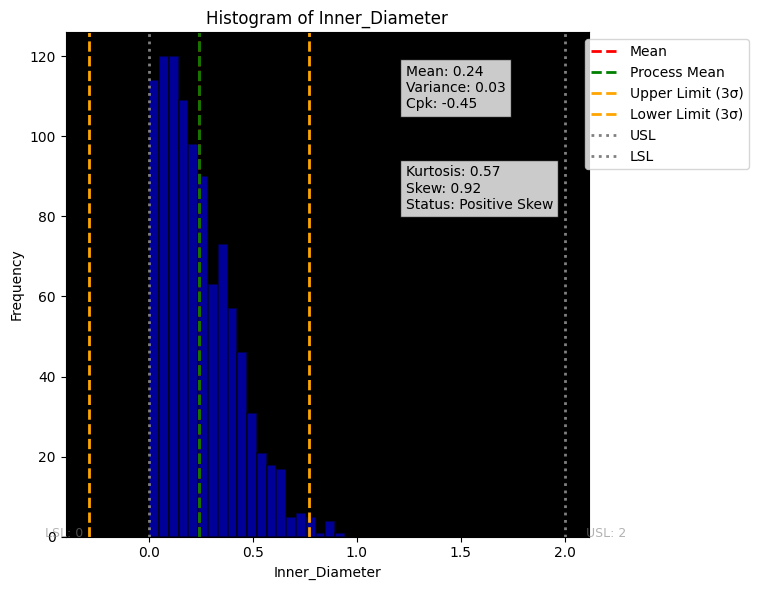

Output Table:
       Field Name  USL  LSL       Mean   Std Dev  Kurtosis    Skew Status  \
0  Product_Height   33    1   7.960066  6.146026  1.151602  Positive Skew   
1  Product_Weight   40   22  29.993650  2.028976  0.476823        No Skew   
2  Inner_Diameter    2    0   0.241245  0.176189  0.571157  Positive Skew   

        Cpk       Ppk        Cp       CpU       CpL           PPM  
0 -0.431859 -0.431859  0.868204  1.358736  0.377672 -4.318588e+05  
1 -1.374590 -1.374590  1.479319  1.644732  1.313907 -1.374590e+06  
2 -0.453952 -0.453952  1.892853  3.329064  0.456641 -4.539520e+05  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

# Load the data from the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/Minitab_Replica/Minitab_Replica_Data/Minitab_Replica_Data.xlsx'
data = pd.read_excel(file_path)

# Extract the relevant columns for the analysis
parameters = ['Product_Height', 'Product_Weight', 'Inner_Diameter']
data = data[parameters]

# Function to display skewness status
def skewness_status(skew_param):
    if abs(skew_param) < 0.5:
        return "No Skew"
    elif skew_param >= 0.5:
        return "Positive Skew"
    else:
        return "Negative Skew"

# Set USL and LSL values for each parameter
usl_values = {'Product_Height': 33, 'Product_Weight': 40, 'Inner_Diameter': 2}
lsl_values = {'Product_Height': 1, 'Product_Weight': 22, 'Inner_Diameter': 0}

# Lists to store statistics for each parameter
field_names = []
usl_list = []
lsl_list = []
mean_list = []
std_dev_list = []
kurtosis_list = []
skew_status_list = []
cpk_list = []
ppk_list = []
cp_list = []
cpu_list = []
cpl_list = []
ppm_list = []

# Calculate statistics for each parameter and append to lists
for param in parameters:
    field_names.append(param)
    usl_list.append(usl_values[param])
    lsl_list.append(lsl_values[param])
    mean_list.append(data[param].mean())
    std_dev_list.append(data[param].std())
    kurtosis_list.append(kurtosis(data[param]))
    skew_param = skew(data[param])
    skew_status_list.append(skewness_status(skew_param))

    process_mean = np.mean(data[param])
    process_std = np.std(data[param])
    cpk = (min(data[param]) - process_mean) / (3 * process_std)
    ppk = min(cpk, (process_mean - lsl_values[param]) / (3 * process_std), (usl_values[param] - process_mean) / (3 * process_std))
    cp = (usl_values[param] - lsl_values[param]) / (6 * process_std)
    cpu = (usl_values[param] - process_mean) / (3 * process_std)
    cpl = (process_mean - lsl_values[param]) / (3 * process_std)
    ppm = ppk * 1e6

    cpk_list.append(cpk)
    ppk_list.append(ppk)
    cp_list.append(cp)
    cpu_list.append(cpu)
    cpl_list.append(cpl)
    ppm_list.append(ppm)

# Create a DataFrame to display the output table
output_df = pd.DataFrame({
    'Field Name': field_names,
    'USL': usl_list,
    'LSL': lsl_list,
    'Mean': mean_list,
    'Std Dev': std_dev_list,
    'Kurtosis': kurtosis_list,
    'Skew Status': skew_status_list,
    'Cpk': cpk_list,
    'Ppk': ppk_list,
    'Cp': cp_list,
    'CpU': cpu_list,
    'CpL': cpl_list,
    'PPM': ppm_list
})

# Display the correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot histograms for each parameter separately
for param in parameters:
    plt.figure(figsize=(8, 6))

    # Plot histogram with a black background
    plt.hist(data[param], bins=20, alpha=0.6, color='blue', edgecolor='black', linewidth=1.2)
    plt.axvline(data[param].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(np.mean(data[param]), color='green', linestyle='dashed', linewidth=2, label='Process Mean')
    plt.axvline(np.mean(data[param]) + 3 * np.std(data[param]), color='orange', linestyle='dashed', linewidth=2, label='Upper Limit (3σ)')
    plt.axvline(np.mean(data[param]) - 3 * np.std(data[param]), color='orange', linestyle='dashed', linewidth=2, label='Lower Limit (3σ)')
    plt.axvline(usl_values[param], color='gray', linestyle='dotted', linewidth=2, label='USL')
    plt.axvline(lsl_values[param], color='gray', linestyle='dotted', linewidth=2, label='LSL')

    # Annotate mean, variance, Cpk, kurtosis, and skewness values inside the plot
    plt.text(0.65, 0.85, f'Mean: {data[param].mean():.2f}\nVariance: {data[param].var():.2f}\nCpk: {cpk:.2f}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    plt.text(0.65, 0.65, f'Kurtosis: {kurtosis(data[param]):.2f}\nSkew: {skew(data[param]):.2f}\nStatus: {skewness_status(skew(data[param]))}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

    # Display "USL" and "LSL" values on the histogram near the x-axis
    plt.text(usl_values[param] + 0.1, 0.005, f'USL: {usl_values[param]}', color='gray', fontsize=9, alpha=0.6)
    plt.text(lsl_values[param] - 0.5, 0.005, f'LSL: {lsl_values[param]}', color='gray', fontsize=9, alpha=0.6)

    plt.xlabel(param)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {param}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
    plt.gca().set_facecolor('black')  # Set histogram background to black
    plt.tight_layout()
    plt.show()

# Display the output table
print("Output Table:")
print(output_df)

